# k-NN算法实现对鸢尾花数据集分类
- 数据集来源：sklearn/datasets/data/iris.csv；（这里转为xlsx格式）

导入pandas库对数据集进行处理

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv("iris.csv")
iris

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### What's k-NN
- k Nearest Neighbours
- e.g. if k = 3, 对于classes 'a' and 'c'， find class for 'c'.
    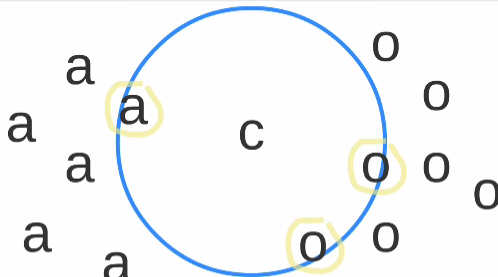

### 划分数据集

In [3]:
import numpy as np
def DivideDataset():
    index = (np.random.permutation(len(iris)))[0:15]
    iris_test  = iris.take(index)
    iris_train = iris.drop(index)
    datasets = [iris_test, iris_train]
    return datasets, iris_test, iris_train

### K-NN算法实现

In [4]:
from collections import Counter
def KNNAlgorithm(train, test, Class_Name, k):
    difference = np.tile(test, (train.shape[0], 1)) - train
    distance = (difference**2)**0.5
    # 消除列，计算每一行的sum
    results = distance.sum(axis=1)
    # 从小到大排序，返回索引值
    results = results.argsort()
    
    label = []
    for i in range(k):
        label.append(Class_Name[np.where(results==i)][0])

    collection = Counter(label)
    final = collection.most_common(1)
    return final

### 准备数据集
- 测试集为其中随机选择的15组数据；
- 训练集为剩余的135组数据；

In [42]:
datasets, iris_test, iris_train = DivideDataset()
amount = len(iris_test)
Class_Name = iris_train['class'].values

# 测试集和训练集
train = iris_train.drop(columns='class').values
Test = iris_test[:].values 

### 测试并计算准确度

In [41]:
correct = 0
for test in Test:
    name = test[-1]
    print(name)
    test = test[0:4]
    final = KNNAlgorithm(train, test, Class_Name, 3)
    print(final[0][0])
    if final[0][0] == name:
        correct += 1
    print('----------------')
rate = correct / amount
print(rate * 100)

Iris-versicolor
Iris-virginica
----------------
Iris-setosa
Iris-setosa
----------------
Iris-setosa
Iris-setosa
----------------
Iris-versicolor
Iris-versicolor
----------------
Iris-versicolor
Iris-versicolor
----------------
Iris-setosa
Iris-setosa
----------------
Iris-versicolor
Iris-virginica
----------------
Iris-setosa
Iris-setosa
----------------
Iris-virginica
Iris-virginica
----------------
Iris-setosa
Iris-setosa
----------------
Iris-setosa
Iris-setosa
----------------
Iris-setosa
Iris-setosa
----------------
Iris-virginica
Iris-virginica
----------------
Iris-virginica
Iris-virginica
----------------
Iris-virginica
Iris-virginica
----------------
86.66666666666667
